<a href="https://colab.research.google.com/github/tarun-tripathi/student-performance-analysis/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

df = pd.read_csv("/content/student-por.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.shape


(649, 33)

In [ ]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df.isnull().sum()


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df['G3'].describe()


,G3
count,649.000000
mean,11.906009
std,3.230656
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


In [ ]:
df['G3'].value_counts().head()


,count
G3,
11,104
10,97
13,82
12,72
14,63


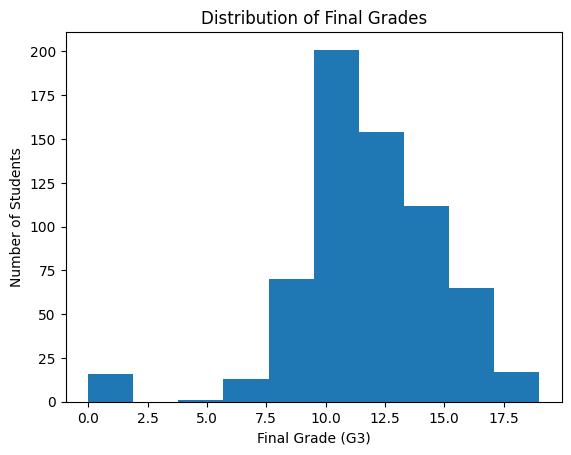

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['G3'], bins=10)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades")
plt.show()


In [ ]:
# Select features and target
features = ['studytime', 'failures', 'absences', 'G1', 'G2']
target = 'G3'

X = df[features]
y = df[target]

X.head()


,studytime,failures,absences,G1,G2
0,2,0,4,0,11
1,2,0,2,9,11
2,2,0,6,12,13
3,3,0,0,14,14
4,2,0,0,11,13


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse


1.1547358286634244

In [ ]:
model.coef_


array([ 0.11416529, -0.15393598,  0.02519171,  0.18119977,  0.8725732 ])

In [ ]:
list(zip(features, model.coef_))


[('studytime', np.float64(0.11416529186571901)),
 ('failures', np.float64(-0.1539359780833467)),
 ('absences', np.float64(0.02519170724774178)),
 ('G1', np.float64(0.18119976523233278)),
 ('G2', np.float64(0.8725731994703826))]

## Conclusion
The model shows that previous academic performance (G1, G2) is the strongest predictor of final grades.
This project helped understand the end-to-end machine learning workflow:
data loading, preprocessing, model training, and evaluation.
